<a href="https://colab.research.google.com/github/dpakkaushik/Time-Series-Forecast/blob/main/TimeSeries_Forecasting_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecast

Time-series forecasting is a technique that utilizes historical and current data to predict future values over a period of time or a specific point in the future. By analyzing data that we stored in the past, we can make informed decisions that can guide our business strategy and help us understand future trends.




## **Business Context:**
One of leading electricity Distribution Company would like to understand demand for electricity for the next 1-2 years to manage the production of electricity and managing the vendors for the same. It is one of the important exercises to getting accurate estimation of demand so that they can procure or produce the electricity as per the demand.


## **Available Data:**
The data of monthly electricity consumption available starting from January 1973 to December 2019. We need to forecast the demand for next two years.
1.	Date – Month & Year
2.	Electricity Consumption – Electricity consumption in Trillion Watts


## **Business Objective:**
1.   Need to forecast the demand of electricity for next 1-2 years.
2.   Compare various models including Decomposition, ETS models, ARIMA/SARIMA Models with various parameters etc…

## **Performance Metrices**

1.   Calculate error metrics (RMSE, RMSPE, MAPE)









In [1]:
#Importing Libraries
import numpy as np
import pandas as pd 

#import matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

#Ignore warinngs
import warnings
warnings.filterwarnings("ignore")

#pd.set_option('display.max_rows', None)  

In [2]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
#setting path for data
path = "/content/drive/MyDrive/Data Sets/Electricity Consumption.csv"
#reading csv
df = pd.read_csv(path)
#show data
df.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


### EDA

In [4]:
#Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [5]:
#Renaming Column for easy addressing 

df.rename(columns={"Electricty_Consumption_in_TW": "Electricity_Consumption","DATE": "Date"},inplace=True)

df.info()

#Formatting Date column to Datetime
df['Date'] = pd.to_datetime(df.Date, format='%m/%d/%Y')

#Extracting Year And Month column from Date and adding as new columns
df['year'] = df.Date.dt.year
df['month'] = df.Date.dt.month 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     561 non-null    object 
 1   Electricity_Consumption  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     561 non-null    datetime64[ns]
 1   Electricity_Consumption  561 non-null    float64       
 2   year                     561 non-null    int64         
 3   month                    561 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 17.7 KB


### Setting Index
#### The data which is indexed by time is called Time Series data, hence need to set Date column as index

In [6]:
df.set_index(df.Date, inplace=True)

#Checking Index
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     561 non-null    datetime64[ns]
 1   Electricity_Consumption  561 non-null    float64       
 2   year                     561 non-null    int64         
 3   month                    561 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 21.9 KB


### Checking Missing Values

In [7]:
#Using isna for missing data
print(df.isna().sum())

#Using groupby to check for any missing month
df.groupby(df.Date.map(lambda x : x.year)).count()

Date                       0
Electricity_Consumption    0
year                       0
month                      0
dtype: int64


,Date,Electricity_Consumption,year,month
Date,,,,
1973,12,12,12,12
1974,12,12,12,12
1975,12,12,12,12
1976,12,12,12,12
1977,12,12,12,12
1978,12,12,12,12
1979,12,12,12,12
1980,12,12,12,12
1981,12,12,12,12


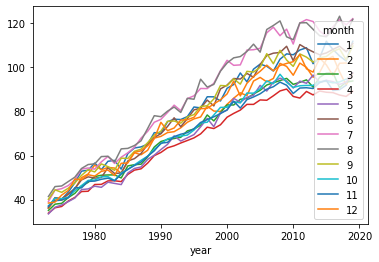

In [8]:
pd.pivot_table(data = df, index = 'year', columns = 'month', values = 'Electricity_Consumption').plot()

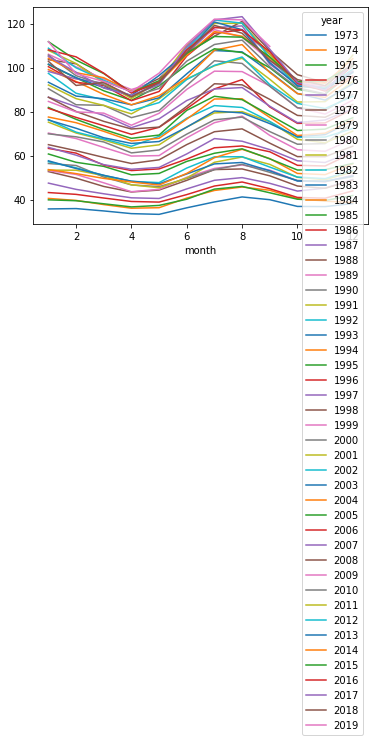

In [9]:
pd.pivot_table(data = df, index = 'month', columns = 'year', values = 'Electricity_Consumption').plot()

### Uses centered moving Average for Decentralise and detrend

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

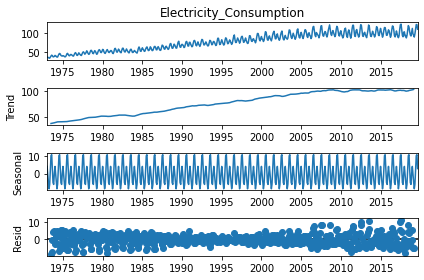

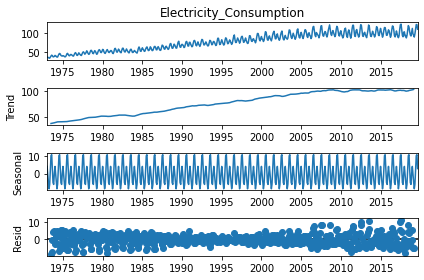

In [11]:
#decom = seasonal_decompose(ts, model='multiplicative')

TS = df.Electricity_Consumption 
decom1 = seasonal_decompose(TS, model='additive')

#Plotting decomposed graph

decom1.plot()

In [12]:
type(decom1)

statsmodels.tsa.seasonal.DecomposeResult

In [13]:
pd.concat([decom1.observed, decom1.trend, decom1.seasonal, decom1.resid], axis=1).head(12)

,Electricity_Consumption,trend,seasonal,resid
Date,,,,
1973-01-01,35.9728,NaN,4.135755,NaN
1973-02-01,36.1334,NaN,-0.705922,NaN
1973-03-01,35.0625,NaN,-4.489678,NaN
1973-04-01,33.8416,NaN,-8.668415,NaN
1973-05-01,33.5107,NaN,-6.044817,NaN
1973-06-01,36.4823,NaN,2.943116,NaN
1973-07-01,39.1412,37.223388,10.277826,-8.360014
1973-08-01,41.4137,37.576442,10.828421,-6.991163
1973-09-01,40.1639,37.850562,2.891998,-0.578660


### decompose using stldecompose

In [50]:
pip install statsmodels==0.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.8.0 requires statsmodels>=0.12.1, but you have statsmodels 0.11.0 which is incompatible.


In [57]:
#Installing stlddecompose package
!pip install stldecompose == 0.0.5


ERROR: Invalid requirement: '=='


In [21]:
yYimport statsmodels

In [25]:
stldecompose.__version__

NameError: ignored

In [53]:
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive, drift, mean, seasonal_naive)

ModuleNotFoundError: ignored

In [34]:
from statsmodels.tsa.seasonal import STL

In [35]:
STL?

In [36]:
stl_decom = STL(df.Electricity_Consumption, period=12)

In [37]:
stl_decom_values = pd.concat([stl_decom.observed, stl_decom.trend, stl_decom.seasonal, stl_decom.resid], axis=1).head(12)
stl_decom_values.columns = ["Actual","Trend","Seasonal","Irregular"]
stl_decom_values
#BY default stl uses additive decomposition in additive decomposition we get few nwgative seasonal values

AttributeError: ignored

In [ ]:

stl_decom.plot()

In [ ]:
f_cast = forecast(stl_decom,steps=24,fc_func= drift, seasonal= True)
f_cast

In [ ]:
plt.figure(figsize=(25,8))

plt.plot(df.Electricity_Consumption,'--', label = 'truth')
plt.plot(stl_decom.trend, ':', label = 'decomp.trend')
plt.plot(f_cast,"-",label = f_cast.columns[0])

plt.legend()

In [ ]:
#Checking Accuracy split
train = df.Electricity_Consumption[:"2018-12-01"]
train

In [ ]:
test = df.Electricity_Consumption["2019-01-01":]
test

In [ ]:
from scipy.signal.ltisys import step
stl_decomp1 = decompose(train,period=12) #additive decomposing
f_cast_9m = forecast(stl_decomp1 ,steps = 9 ,fc_func= drift, seasonal= True)

In [ ]:
f_cast_9m

In [ ]:
#Calculating MAPE
np.mean(abs(f_cast_9m['drift+seasonal']-test))

### ETS Model

ETS (Error, Trend, Seasonal) method is an approach method for forecasting time series univariate. This ETS model focuses on trend and seasonal components. The flexibility of the ETS model lies. in its ability to trend and seasonal components of different traits.

Both  ARIMA and ETS models are widely used approaches in forecasting time series data. However, the two models differ in the main component that is focused on. ETS models focus on the trend and seasonality in the data while ARIMA focuses on the autocorrelations in the data.

In [ ]:
#ETS modelsm
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
##Backward testing

In [ ]:
from sklearn.metrics import mean_absolute_error

def auto_hwm(timeseries, val_split_date, alpha=[None], beta=[None], gamma=[None], 
              trend=None, seasonal=None, periods=None, verbose=False):

    best_params = []
    actual = timeseries[val_split_date:]

    print('Evaluating Exponential Smoothing model for', len(alpha) * len(beta) * len(gamma), 'fits\n')

    for a in alpha:
        for b in beta:
            for g in gamma:

                    if(verbose == True):
                        print('Checking for', {'alpha': a, 'beta': b, 'gamma': g})

                    model = ExponentialSmoothing(timeseries, trend=trend, seasonal=seasonal, seasonal_periods=periods)
                    model = model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
                    f_cast = model.fittedvalues
                    score = (mean_absolute_error(actual, f_cast))  

                    best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'mae': score})

    return min(best_params, key=lambda x: x['mae'])

In [ ]:
ts = df.Electricity_Consumption


In [ ]:
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
beta = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
gamma =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

In [ ]:
auto_hwm(ts, val_split_date ='1973-01-01' , alpha=alpha, beta=beta, gamma=gamma, trend='mul', seasonal='mul', periods=12, verbose=True)

### Checking Model Accuracy

In [ ]:
ets_model1 = ExponentialSmoothing(train , trend='mul', seasonal='mul', seasonal_periods=13).fit(smoothing_level=0.6, smoothing_slope=0.1, smoothing_seasonal=0.2)

In [ ]:
ets_model = ExponentialSmoothing(train , trend='mul', seasonal='mul', seasonal_periods=13).fit(smoothing_level=0.1, smoothing_slope=0.5, smoothing_seasonal=0.2)

In [ ]:
fcast1 = ets_model1.forecast(9)
fcast1

In [ ]:
fcast = ets_model.forecast(9)
fcast

In [ ]:
# Error Measurement
print('test error', np.mean(np.abs(test - fcast)))
print(mean_absolute_error(test,fcast))

In [ ]:
# Error Measurement
print('test error', np.mean(np.abs(test - fcast1)))
print(mean_absolute_error(test,fcast1))

In [ ]:
### Forecast
ets_model.forecast(31)

In [ ]:
print(ets_model.summary())

In [ ]:
# Identify pdq 
# need to apply Sarima
#ACF plots PACF plots ADF test and the series is stationary or not

from statsmodels.tsa.stattools import acf, pacf_ols

In [ ]:
acf(ts) 

In [ ]:
pacf_ols(ts)

In [ ]:
import statsmodels.tsa.api as smt

In [ ]:
# can check stationary or not
# ARIMA model possible or not
# Having pattern hence data has seasonality
# Note- If Auto correlation value not coming close to zero or crossing zero means it is a non stationary series
smt.graphics.plot_acf(ts, lags=24)

In [ ]:
smt.graphics.plot_pacf(ts, lags = 24, method='ols')


In [ ]:
#Is the series stationary?
#To make it a stationary series we can use following methods
# Take log transformation
#detrend the series
#deseasonalise the series
# take differencing
# or use combination of that
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(ts)   #p-value: 0.9952   , since p-value is high, the series(ts) is not stationary

In [ ]:
#Taking log of value
ts_log = np.log(ts)

In [ ]:
adfuller(ts_log) #p-value = 0.41446449274910446, since p-value is low, the series(ln_ts) is stationary

In [ ]:
stationary_series = ts_log
stationary_series

In [ ]:
smt.graphics.plot_acf(stationary_series, lags=24)

In [ ]:
stat_ser = ts.diff().dropna()

In [ ]:
smt.graphics.plot_acf(stat_ser, lags=24)
#The plot loooks simillar at places it indicates it data has seasonality and we need to perform sarima model for this
#WE can conclude q values by looking at plot -- after which lag value crossing zero (here it is after lag 1) hence q = 1

In [ ]:
smt.graphics.plot_pacf(stationary_series, lags=24)
#WE can conclude p values by looking at plot -- after which lag value crossing zero (here it is after lag 1) hence p = 1

In [ ]:
#Now P D T Q for SARIMA
# T - time period after which number is repeating
# P - will be approximatly equal to p
# Q - will be approximatly equal to q
# D = 0 As series is stationary

# Note to find exact values of p,d,q we perform iterations

arima_input = np.log(ts)

import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(arima_input, order = (1,1,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

print(model.summary())


In [ ]:
#import sys
import itertools
import warnings

#regressor is for multivariate timeseries
def auto_arima(arima_input, regressors=None, p=range(0, 2), d=range(0, 1), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=arima_input,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [ ]:
best_results = auto_arima(arima_input,  p=range(0, 3), d=range(0,1), q=range(0, 3),
                         P=range(0, 3), D=range(0,1), Q=range(0, 3))    #Number of models = 3*1*3*3*2*3 = 162

In [ ]:
#deee

#kauhi